In [264]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
import os

In [265]:
data2 = pd.read_csv('Data/sentimen/sentimen_label.csv')

In [266]:
df2 = pd.DataFrame(data2)

In [267]:
data2.head()

,Datetime,Tweet Id,Location,Username,Text,remove_user,normalisasi,case_folding,tokenisasi,stopword_removal,stemming,scores,compound,sentimen
0,2022-12-13 23:24:59+00:00,1.600000e+23,"Batam, Indonesia",gokepricom,b'Dispar Kepri Jamin RUU KUHP yang Baru Tak Ga...,b'Dispar Kepri Jamin RUU KUHP yang Baru Tak Ga...,Dispar Kepri Jamin RUU KUHP yang Baru Tak Gan...,dispar kepri jamin ruu kuhp yang baru tak gan...,"['dispar', 'kepri', 'jamin', 'ruu', 'kuhp', 'y...","['dispar', 'kepri', 'jamin', 'ruu', 'kuhp', 'g...",dispar kepri jamin ruu kuhp ganggu pariwisata,"{'neg': 0.193, 'neu': 0.68, 'pos': 0.128, 'com...",-0.2828,negatif
1,2022-12-13 23:23:28+00:00,1.600000e+23,"Bali, Indonesia",MenSang3,"b'Ini RUU KUHP maksudnya...pacaran di hotel, M...","b'Ini RUU KUHP maksudnya...pacaran di hotel, M...",Ini RUU KUHP maksudnya pacaran hotel polisi g...,ini ruu kuhp maksudnya pacaran hotel polisi g...,"['ini', 'ruu', 'kuhp', 'maksudnya', 'pacaran',...","['ruu', 'kuhp', 'maksudnya', 'pacaran', 'hotel...",ruu kuhp maksud pacar hotel polisi gerebek ort...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.6207,negatif
2,2022-12-13 23:21:42+00:00,1.600000e+23,NaN,UmmuZaki30,"b'""Pasal Karet"" RUU KUHP AntiDemokrasi: Menyer...","b'""Pasal Karet"" RUU KUHP AntiDemokrasi: Menyer...",Pasal Karet RUU KUHP AntiDemokrasi Menyeret R...,pasal karet ruu kuhp antidemokrasi menyeret r...,"['pasal', 'karet', 'ruu', 'kuhp', 'antidemokra...","['pasal', 'karet', 'ruu', 'kuhp', 'antidemokra...",pasal karet ruu kuhp antidemokrasi seret rakya...,"{'neg': 0.275, 'neu': 0.557, 'pos': 0.167, 'co...",-0.5106,negatif
3,2022-12-13 22:13:03+00:00,1.600000e+23,Indonesia,kompasiana,b'Kohabitasi antara Penolakan dan Penerimaan s...,b'Kohabitasi antara Penolakan dan Penerimaan s...,Kohabitasi antara Penolakan dan Penerimaan se...,kohabitasi antara penolakan dan penerimaan se...,"['kohabitasi', 'antara', 'penolakan', 'dan', '...","['kohabitasi', 'penolakan', 'penerimaan', 'dam...",kohabitasi tolak terima dampak kesah ruu kuhp ...,"{'neg': 0.301, 'neu': 0.568, 'pos': 0.131, 'co...",-0.5994,negatif
4,2022-12-13 22:01:28+00:00,1.600000e+23,NaN,DemokratProbo1,"b'jangan diam, perjuangkan hak rakyat salam RU...","b'jangan diam, perjuangkan hak rakyat salam RU...",jangan diam perjuangkan hak rakyat salam RUU ...,jangan diam perjuangkan hak rakyat salam ruu ...,"['jangan', 'diam', 'perjuangkan', 'hak', 'raky...","['diam', 'perjuangkan', 'hak', 'rakyat', 'sala...",diam juang hak rakyat salam ruu kuhp janban ra...,"{'neg': 0.1, 'neu': 0.772, 'pos': 0.128, 'comp...",0.0217,positif


In [268]:
data2['sentimen'].value_counts()

sentimen
negatif    2480
positif     657
neutral     149
Name: count, dtype: int64

In [269]:
kelas = data2['sentimen'].to_numpy()
kelas

array(['negatif', 'negatif', 'negatif', ..., 'positif', 'positif',
       'positif'], dtype=object)

In [270]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

TWEET_DATA = pd.read_csv("Data/sentimen/sentimen_label.csv", usecols=["tokenisasi","sentimen"])
TWEET_DATA.columns = ["tweet","label"]

TWEET_DATA.head()

,tweet,label
0,"['dispar', 'kepri', 'jamin', 'ruu', 'kuhp', 'y...",negatif
1,"['ini', 'ruu', 'kuhp', 'maksudnya', 'pacaran',...",negatif
2,"['pasal', 'karet', 'ruu', 'kuhp', 'antidemokra...",negatif
3,"['kohabitasi', 'antara', 'penolakan', 'dan', '...",negatif
4,"['jangan', 'diam', 'perjuangkan', 'hak', 'raky...",positif


In [271]:
# convert list formated string to list
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

TWEET_DATA["tweet_list"] = TWEET_DATA["tweet"].apply(convert_text_list)


print(TWEET_DATA["tweet_list"][90])

print("\ntype : ", type(TWEET_DATA["tweet_list"][90]))

['pengesahan', 'ruu', 'kuhp', 'ntonggak', 'baru', 'kemajuan', 'indonesia', 'wujudkanrimaju']

type :  <class 'list'>


In [272]:
#TF
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

TWEET_DATA["TF_dict"] = TWEET_DATA['tweet_list'].apply(calc_TF)

TWEET_DATA["TF_dict"].head()

0    {'dispar': 0.1, 'kepri': 0.1, 'jamin': 0.1, 'r...
1    {'ini': 0.043478260869565216, 'ruu': 0.0434782...
2    {'pasal': 0.08333333333333333, 'karet': 0.0833...
3    {'kohabitasi': 0.08333333333333333, 'antara': ...
4    {'jangan': 0.045454545454545456, 'diam': 0.045...
Name: TF_dict, dtype: object

In [273]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in TWEET_DATA["TF_dict"][index]:
    print('%20s' % key, "\t", TWEET_DATA["TF_dict"][index][key])

                term 	 TF

          pengesahan 	 0.125
                 ruu 	 0.125
                kuhp 	 0.125
            ntonggak 	 0.125
                baru 	 0.125
            kemajuan 	 0.125
           indonesia 	 0.125
      wujudkanrimaju 	 0.125


In [274]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(TWEET_DATA["TF_dict"])


In [275]:
#Untuk menghitung IDF pada Python dengan cara berikut

n_document = len(TWEET_DATA)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [276]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
TWEET_DATA["TF-IDF_dict"] = TWEET_DATA["TF_dict"].apply(calc_TF_IDF)

In [277]:
#TF-IDF menjadi TF-IDF vector data berbentuk Sparse Matrix

# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

TWEET_DATA["TF_IDF_Vec"] = TWEET_DATA["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(TWEET_DATA["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(TWEET_DATA["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.005312089160657452, 0.007289142699151763, 0.0, 0.0, 0.17173037616974485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.32376138942355415, 0.0, 0.0, 0.0, 0.0, 0.0]

matrix size :  50


In [278]:
#menampilkan top 50 term TF-IDF 
# Convert Series to List
TF_IDF_Vec_List = np.array(TWEET_DATA["TF_IDF_Vec"].to_list())

# Sum element vector in axis=0 
sums = TF_IDF_Vec_List.sum(axis=0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term', 'rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
2,hukum,85.140605
26,dukung,79.214423
5,indonesia,67.765647
6,masyarakat,65.555147
3,dan,62.554408
18,ruukuhp,61.327709
10,presiden,60.694697
9,pasal,58.794858
35,undang,58.496070
21,jokowi,58.187817


In [279]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
TWEET_DATA["tweet_join"] = TWEET_DATA["tweet"].apply(join_text_list)

TWEET_DATA["tweet_join"].head()

0    dispar kepri jamin ruu kuhp yang baru tak gang...
1    ini ruu kuhp maksudnya pacaran hotel polisi ga...
2    pasal karet ruu kuhp antidemokrasi menyeret ra...
3    kohabitasi antara penolakan dan penerimaan seb...
4    jangan diam perjuangkan hak rakyat salam ruu k...
Name: tweet_join, dtype: object

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# calc TF vector
cvect = CountVectorizer(max_features=max_features)
TF_vector = cvect.fit_transform(TWEET_DATA["tweet_join"])

# normalize TF vector
normalized_TF_vector = normalize(TF_vector, norm='l1', axis=1)

# calc IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf=False)
tfs = tfidf.fit_transform(TWEET_DATA["tweet_join"])
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = normalized_TF_vector.multiply(IDF_vector).toarray()


In [281]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 1000

# ngram_range (1, 3) to use unigram, bigram, trigram
cvect = CountVectorizer(max_features=max_features, ngram_range=(1,3))
counts = cvect.fit_transform(TWEET_DATA["tweet_join"])

normalized_counts = normalize(counts, norm='l1', axis=1)

tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(TWEET_DATA["tweet_join"])

tfidf_mat = normalized_counts.multiply(tfidf.idf_).toarray()

In [282]:
type(counts)
counts.shape

(3286, 1000)

In [283]:
print(tfidf.vocabulary_)

{'ruu': 741, 'kuhp': 360, 'yang': 994, 'baru': 50, 'tak': 887, 'pariwisata': 595, 'ruu kuhp': 742, 'kuhp yang': 414, 'yang baru': 996, 'ruu kuhp yang': 780, 'ini': 244, 'hotel': 209, 'polisi': 675, 'gak': 186, 'bisa': 77, 'harus': 204, 'kalau': 274, 'juga': 271, 'boleh': 81, 'aja': 14, 'pasal': 599, 'rakyat': 710, 'penjara': 634, 'demi': 110, 'menjamin': 511, 'penolakan': 636, 'dan': 100, 'sebagai': 813, 'pengesahan': 628, 'pengesahan ruu': 629, 'kuhp baru': 363, 'pengesahan ruu kuhp': 630, 'ruu kuhp baru': 745, 'jangan': 254, 'hak': 198, 'sampai': 798, 'mati': 475, 'aturan': 30, 'pemerintah': 622, 'paling': 588, 'masa': 457, 'koruptor': 352, 'apa': 23, 'tujuan': 943, 'itu': 250, 'kalo': 276, 'dpr': 154, 'menjadi': 508, 'karena': 288, 'jadi': 251, 'mereka': 528, 'anggota': 22, 'komisi': 344, 'mendukung': 491, 'pembaharuan': 613, 'hukum': 210, 'pidana': 666, 'melalui': 479, 'produk': 690, 'warisan': 984, 'kolonial': 341, 'belanda': 54, 'akan': 16, 'hukum pidana': 220, 'kuhp sebagai': 40

In [284]:
print(tfidf.get_feature_names_out())
a=tfidf.get_feature_names_out()

['ada' 'ada pasal' 'adalah' 'adanya' 'aduan' 'agama' 'agar'
 'agar pemerintah' 'agar pemerintah dan' 'ahli' 'ahli hukum'
 'ahli hukum belanda' 'ahli hukum indonesia' 'air' 'aja' 'akademisi'
 'akan' 'akhir' 'akhir tahun' 'aksi' 'aku' 'anak' 'anggota' 'apa' 'apakah'
 'asing' 'aspirasi' 'aspirasi masyarakat' 'atas' 'atau' 'aturan' 'ayat'
 'ayo' 'baca' 'bagi' 'bahas' 'bahas ruu' 'bahas ruu kuhp' 'bahwa' 'baik'
 'bakal' 'bali' 'banget' 'bangkit' 'bangkit kuat' 'bangsa' 'bangsa kuat'
 'bangsa yang' 'banyak' 'barat' 'baru' 'baru kemajuan'
 'baru kemajuan indonesia' 'beberapa' 'belanda' 'belum' 'benar' 'beradab'
 'beralasan' 'berantaskorupsi' 'berantaskorupsi hukumdankeadilan'
 'berantaskorupsi hukumdankeadilan indonesiabebaskorupsi' 'berbagai'
 'berdaulat' 'berharap' 'berita' 'berlaku' 'bermasalah' 'bersama'
 'bertumbuh' 'besar' 'bhpsemarang' 'bhpsemarang kamipasti'
 'bhpsemarang kumhampasti' 'bhpsemarang kumhampasti kamipasti' 'bijak'
 'bikin' 'bisa' 'bisa dipenjara' 'bisa segera' 'bisa sege

In [285]:
print(tfs.toarray)
b=tfs.toarray()

<bound method _cs_matrix.toarray of <3286x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 56158 stored elements in Compressed Sparse Row format>>


In [286]:
tfidf_mat = normalized_counts.multiply(IDF_vector).toarray()
dfbtf =pd.DataFrame(data=tfidf_mat,columns=[a])
dfbtf

,ada,ada pasal,adalah,adanya,aduan,agama,agar,agar pemerintah,agar pemerintah dan,ahli,...,xad,xbb,xbc,xef,yang,yang akan,yang baru,yang telah,yasonna,yasonna laoly
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.669953,0.0,0.645837,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.418721,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,0.0,0.0,0.253601,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3282,0.0,0.0,0.000000,0.0,0.0,0.0,0.096833,0.153771,0.117959,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3283,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3284,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [290]:
config = {'algorithm': 'C4.5'}

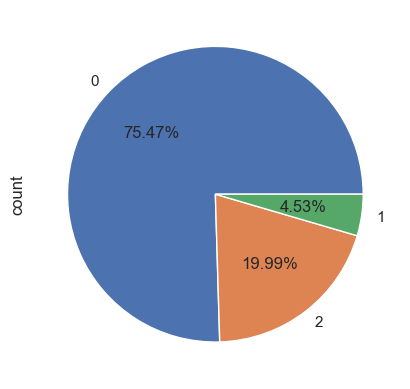

In [291]:
# Membuat jumah visualisasi dari masing-masing klasifikasi
config = {'algorithm': 'C4.5'}

data = df['sentimen'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

In [289]:
# Menentukan X & y
X = df.drop(['compound', 'sentimen'], axis=1)
y = df['sentimen']

In [292]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [293]:
#test
y_pred = [1, 1, 0]
y_true = [1, 1, 1]
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       1.00      0.67      0.80         3
   macro avg       0.33      0.22      0.27         3
weighted avg       1.00      0.67      0.80         3



In [294]:
# Membangun model pohon keputusan dengan algoritma C4.5
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.3470982142857143, 0.9666666666666667, 'x[3] <= 0.128\nentropy = 0.971\nsamples = 2628\nvalue = [1989, 122, 517]'),
 Text(0.061224489795918366, 0.9, 'x[1] <= 0.042\nentropy = 0.503\nsamples = 1684\nvalue = [1541, 80, 63]'),
 Text(0.04081632653061224, 0.8333333333333334, 'x[2] <= 0.981\nentropy = 0.934\nsamples = 100\nvalue = [0, 65, 35]'),
 Text(0.030612244897959183, 0.7666666666666667, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]'),
 Text(0.05102040816326531, 0.7666666666666667, 'entropy = 0.0\nsamples = 65\nvalue = [0, 65, 0]'),
 Text(0.08163265306122448, 0.8333333333333334, 'x[1] <= 0.128\nentropy = 0.205\nsamples = 1584\nvalue = [1541, 15, 28]'),
 Text(0.07142857142857142, 0.7666666666666667, 'x[3] <= 0.087\nentropy = 0.692\nsamples = 322\nvalue = [279, 15, 28]'),
 Text(0.02040816326530612, 0.7, 'x[3] <= 0.076\nentropy = 0.111\nsamples = 233\nvalue = [230, 1, 2]'),
 Text(0.01020408163265306, 0.6333333333333333, 'entropy = 0.0\nsamples = 200\nvalue = [200, 0, 0]'),
 Text(

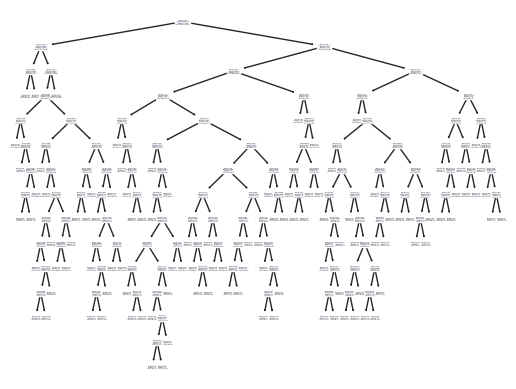

In [295]:
tree.plot_tree(clf)

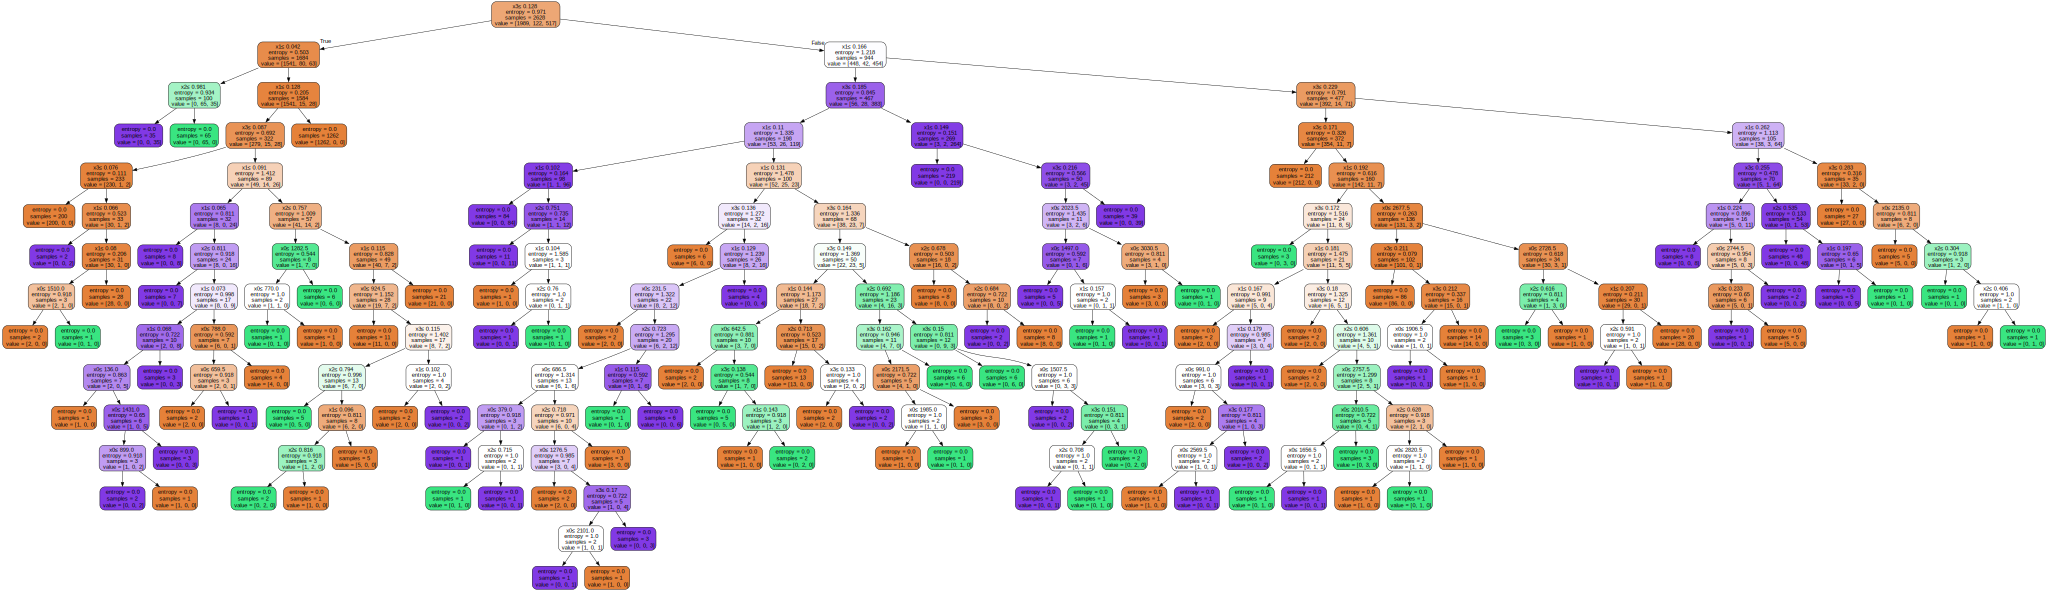

In [296]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [302]:
# Memprediksi sentimen pada data uji
y_pred = clf.predict(X_test)

Hasil model C.45

Accuracy :  0.9620060790273556

Confusion Matrix : 
 [[487   2   2]
 [  9  18   0]
 [ 12   0 128]]


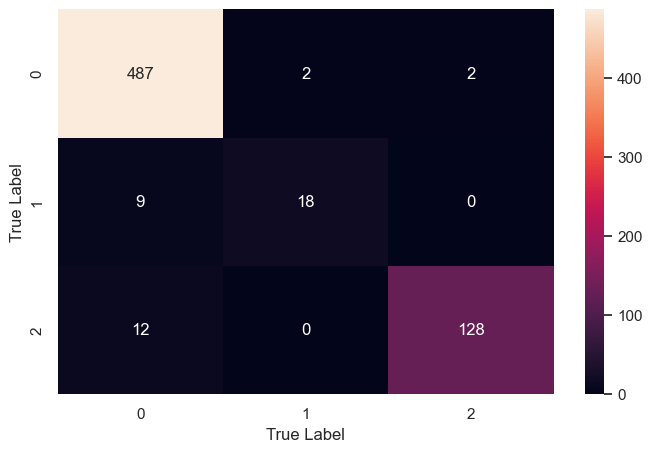

In [308]:
# Menghitung akurasi
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#from imblearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct some pipelines
pipe_dt = Pipeline(steps=[('scaling',StandardScaler()), 
                          ('classifier', DecisionTreeClassifier
                           (random_state=42, max_depth=7, criterion='entropy'))])
pipes = [pipe_dt]
names_pipes = ['Hasil model C.45']

for i in range(len(pipes)):
  print(names_pipes[i])
  pipes[i].fit(X_train, y_train)
  y_pred = pipes[i].predict(X_test)
  print('\nAccuracy : ',accuracy_score(y_test, y_pred))
  print('\nConfusion Matrix : \n' , confusion_matrix(y_test, y_pred))

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("True Label")
plt.show()

In [262]:
#NEGATIVE Dengan Angka  0
#NEUTRAL Dengan Angka   1
#POSITIVE Dengan Angka  2

In [263]:
#Alhamdulilah siappppppppppp